Linear **DIVISION** Classfier (Supervised)

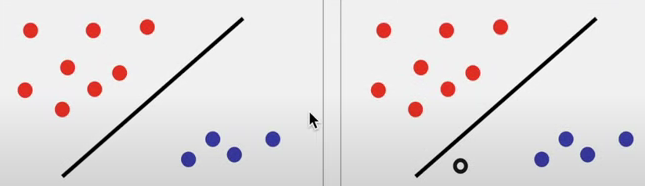

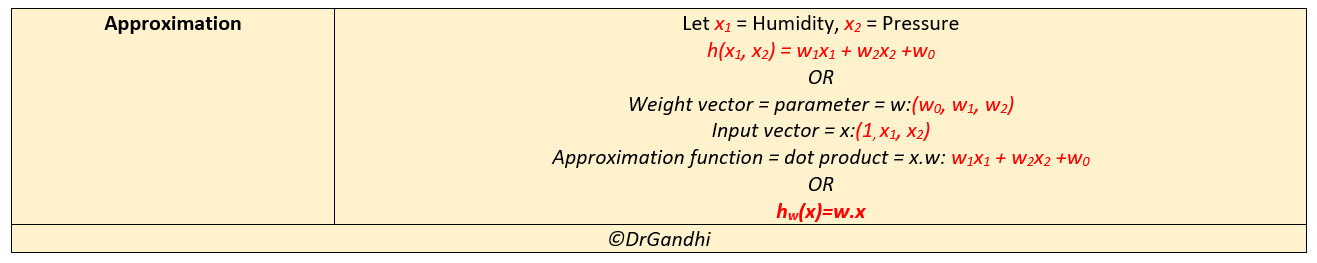

**Perceptron Classifier**

In a linear algorithm that can be applied to **binary classfication** https://bit.ly/3oJf08q

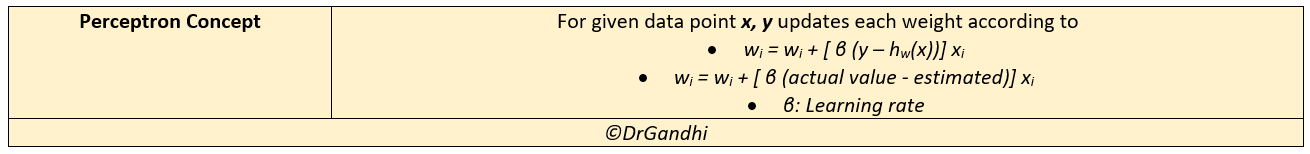

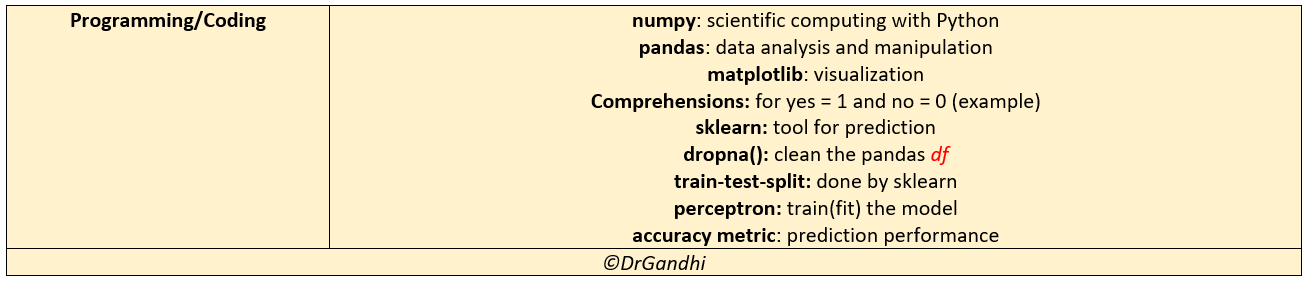

In [1]:
import pandas  as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import Perceptron 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
data = pd.read_csv('WEATHER.csv', parse_dates=True, index_col=0)
data.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes


In [4]:
# to know null values in the DATA
data.isnull()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-02,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-03,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-04,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-05,False,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-06-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-06-23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# In short... to know TOTAL nulls
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [6]:
# Create new df as per your requirement/features 
newdata = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']].dropna()
newdata.head(2)

,Humidity3pm,Pressure3pm,RainTomorrow
Date,,,
2008-02-01,84.0,1017.4,Yes
2008-02-02,73.0,1016.4,Yes


In [7]:
# Let's check
newdata.isnull().sum()

Humidity3pm     0
Pressure3pm     0
RainTomorrow    0
dtype: int64

In [8]:
# Define X and y with comprehension
X = newdata[["Humidity3pm",	"Pressure3pm"]]
y = newdata['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# Perceptron classfier 
clf = Perceptron(random_state=0) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred)

0.7729468599033816

In [12]:
# prediction comparison
sum(y ==0)/len(y)

0.7407071622846781

## **OPTIONAL**

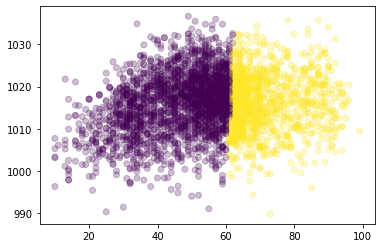

In [13]:
# Plot the entire data
fig, ax = plt.subplots() 
X_data = X.to_numpy() 
y_all = clf.predict(X_data) 
ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y_all, alpha=0.25)

**Exercise**




Consider a **Perceptron** with **MORE** dimensions 

Conclude whether MORE dimensions is **better** than 2-dimensions or **NOT**

(c) *DrGandhi*